In [68]:
import japanize_matplotlib  # noqa
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["font.size"] = 25
plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["axes.labelsize"] = 25
plt.rcParams["axes.titlesize"] = 30

METRICS_MAP = {
    "exec_time": "実行時間 (秒)",
    "exec_time_rate": "実行時間の比率",
    "user_util": "ユーザー満足度",
    "mean_max_envy": "Mean Max Envy",
    "pct_item_util_better": "% Items Better Off",
    "pct_item_util_worse": "% Items Worse Off",
}
METRICS = list(METRICS_MAP.keys())
METHOD_MAP = {
    "greedy": "Greedy",
    "expo_fair": "Exposure-Based",
    "nsw": "NSW",
    "greedy_nsw": "Greedy-NSW",
    # "ot_nsw": "OT-NSW（Ours）",
}

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
registered_colors = {k: colors[i] for i, k in enumerate(METHOD_MAP.values())}
legend = list(registered_colors.keys())
palette = [registered_colors[method] for method in legend]

In [69]:
result_df = pd.read_csv("../output/result.csv").query(
    'optimizer_params_method != "pg_ot" & exp_name == "exp_base"'
)
result_df["method"] = result_df["optimizer_name"].map(METHOD_MAP)
result_df["exec_time_rate"] = np.nan
ideal_df = result_df.query('method == "NSW"').reset_index(drop=True)
result_df = pd.merge(
    result_df[["generator_n_doc", "seed", "method"] + METRICS],
    ideal_df[["generator_n_doc", "seed"] + METRICS],
    on=["generator_n_doc", "seed"],
    suffixes=("", "_nsw"),
    how="left",
)

# nswの実行時間に対する比
result_df["exec_time_rate"] = result_df["exec_time"] / result_df["exec_time_nsw"]
# result_df = result_df[result_df[METRICS].notna().all(axis=1)].reset_index(drop=True)

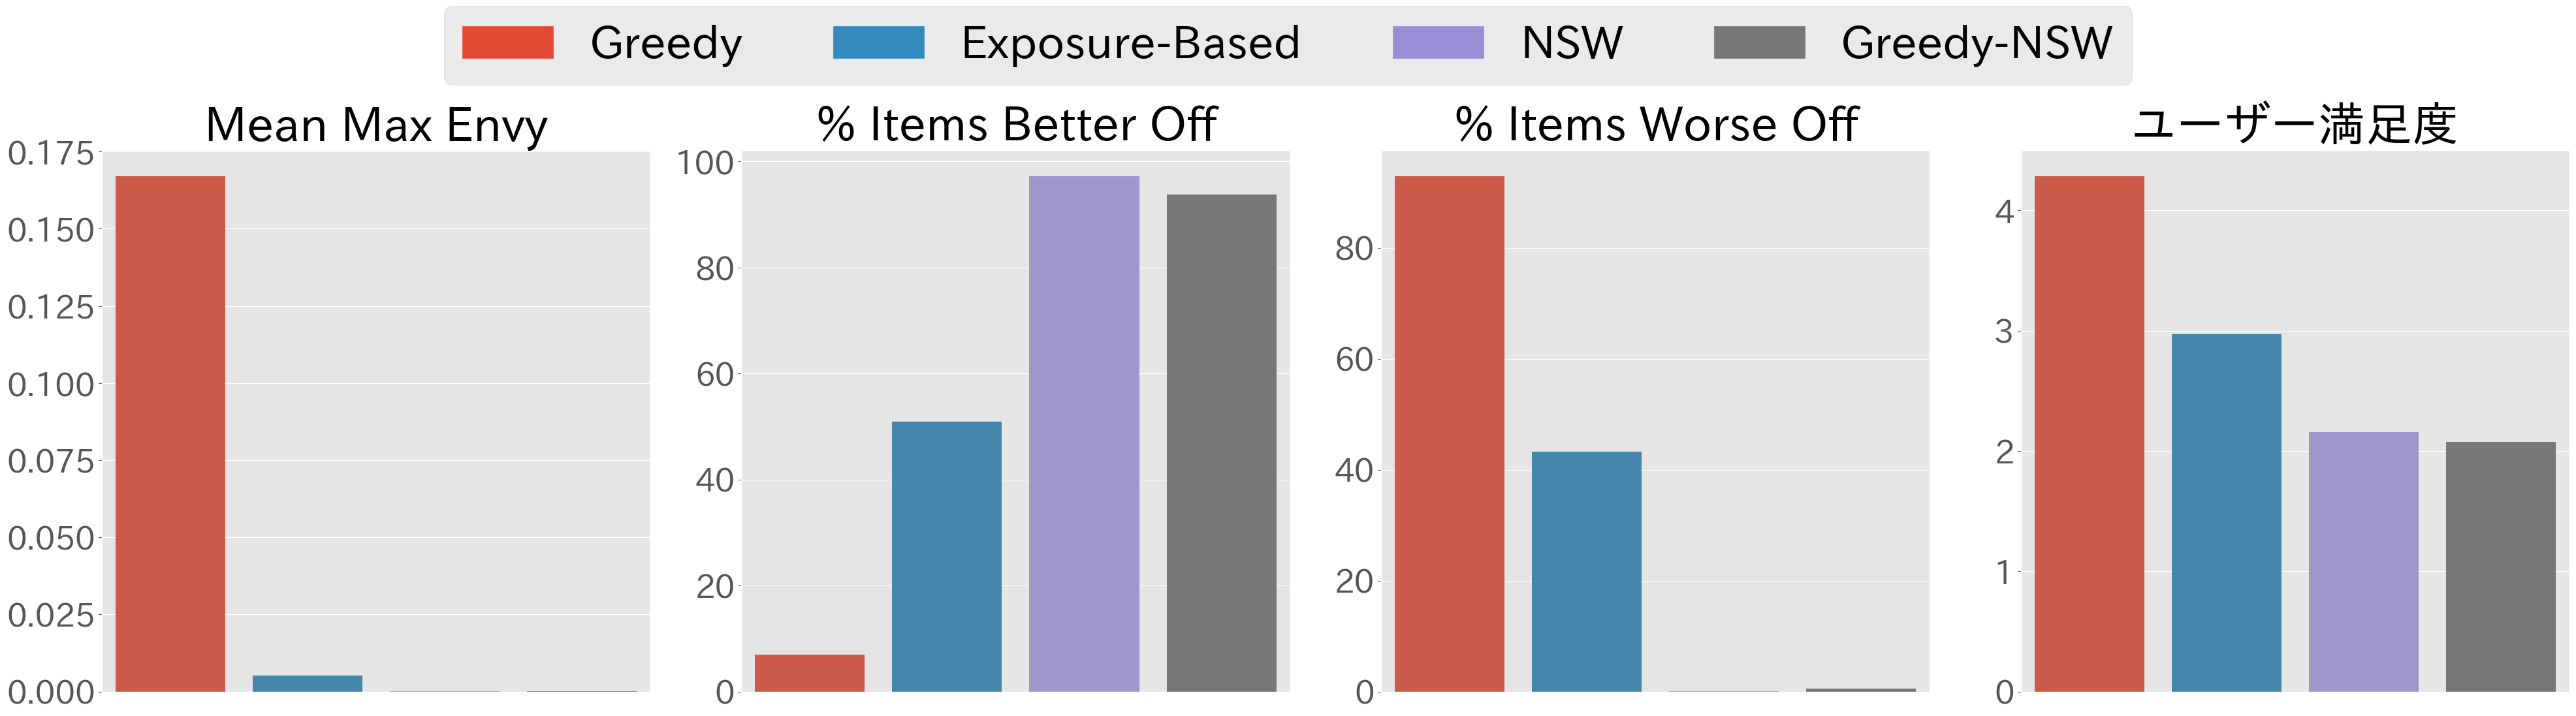

In [74]:
fig, axes = plt.subplots(ncols=4, figsize=(40, 10), tight_layout=True)
axes = np.ravel(axes)
for i, metric in enumerate(
    ["mean_max_envy", "pct_item_util_better", "pct_item_util_worse", "user_util"]
):
    ax = sns.barplot(
        result_df,
        x="method",
        y=metric,
        ax=axes[i],
        legend=False,
        order=legend,
        palette=palette,
        hue="method",
        hue_order=legend,
        errorbar=None,
    )
    ax.set_title(METRICS_MAP[metric], fontsize=52)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.tick_params(axis="both", labelsize=35)
    ax.set_xticks([])

handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(legend))]
fig.legend(
    handles,
    legend,
    fontsize=50,
    bbox_to_anchor=(0.5, 1.15),
    ncol=len(legend),
    loc="upper center",
)